## Fannie Mae Loan Performance Data

### csv to parquet

In [1]:
import os
import time
import pandas as pd
import polars as pl
import pyarrow as pa
import pyarrow.parquet as pq

In [2]:
csv_folder = f"{os.getcwd()}/csv"
csv_files = [os.path.splitext(f)[0] for f in os.listdir(csv_folder) if f.endswith(".csv")]
csv_files.sort()

parquet_folder = os.path.join(os.getcwd(), "parquet")
os.makedirs(parquet_folder, exist_ok=True)

In [3]:
col_names = [
    "POOL_ID",
    "LOAN_ID",
    "ACT_PERIOD",
    "CHANNEL",
    "SELLER",
    "SERVICER",
    "MASTER_SERVICER",
    "ORIG_RATE",
    "CURR_RATE",
    "ORIG_UPB",
    "ISSUANCE_UPB",
    "CURRENT_UPB",
    "ORIG_TERM",
    "ORIG_DATE",
    "FIRST_PAY",
    "LOAN_AGE",
    "REM_MONTHS",
    "ADJ_REM_MONTHS",
    "MATR_DT",
    "OLTV",
    "OCLTV",
    "NUM_BO",
    "DTI",
    "CSCORE_B",
    "CSCORE_C",
    "FIRST_FLAG",
    "PURPOSE",
    "PROP",
    "NO_UNITS",
    "OCC_STAT",
    "STATE",
    "MSA",
    "ZIP",
    "MI_PCT",
    "PRODUCT",
    "PPMT_FLG",
    "IO",
    "FIRST_PAY_IO",
    "MNTHS_TO_AMTZ_IO",
    "DLQ_STATUS",
    "PMT_HISTORY",
    "MOD_FLAG",
    "MI_CANCEL_FLAG",
    "Zero_Bal_Code",
    "ZB_DTE",
    "LAST_UPB",
    "RPRCH_DTE",
    "CURR_SCHD_PRNCPL",
    "TOT_SCHD_PRNCPL",
    "UNSCHD_PRNCPL_CURR",
    "LAST_PAID_INSTALLMENT_DATE",
    "FORECLOSURE_DATE",
    "DISPOSITION_DATE",
    "FORECLOSURE_COSTS",
    "PROPERTY_PRESERVATION_AND_REPAIR_COSTS",
    "ASSET_RECOVERY_COSTS",
    "MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS",
    "ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY",
    "NET_SALES_PROCEEDS",
    "CREDIT_ENHANCEMENT_PROCEEDS",
    "REPURCHASES_MAKE_WHOLE_PROCEEDS",
    "OTHER_FORECLOSURE_PROCEEDS",
    "NON_INTEREST_BEARING_UPB",
    "PRINCIPAL_FORGIVENESS_AMOUNT",
    "ORIGINAL_LIST_START_DATE",
    "ORIGINAL_LIST_PRICE",
    "CURRENT_LIST_START_DATE",
    "CURRENT_LIST_PRICE",
    "ISSUE_SCOREB",
    "ISSUE_SCOREC",
    "CURR_SCOREB",
    "CURR_SCOREC",
    "MI_TYPE",
    "SERV_IND",
    "CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT",
    "CUMULATIVE_MODIFICATION_LOSS_AMOUNT",
    "CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS",
    "CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS",
    "HOMEREADY_PROGRAM_INDICATOR",
    "FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT",
    "RELOCATION_MORTGAGE_INDICATOR",
    "ZERO_BALANCE_CODE_CHANGE_DATE",
    "LOAN_HOLDBACK_INDICATOR",
    "LOAN_HOLDBACK_EFFECTIVE_DATE",
    "DELINQUENT_ACCRUED_INTEREST",
    "PROPERTY_INSPECTION_WAIVER_INDICATOR",
    "HIGH_BALANCE_LOAN_INDICATOR",
    "ARM_5_YR_INDICATOR",
    "ARM_PRODUCT_TYPE",
    "MONTHS_UNTIL_FIRST_PAYMENT_RESET",
    "MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET",
    "INTEREST_RATE_CHANGE_DATE",
    "PAYMENT_CHANGE_DATE",
    "ARM_INDEX",
    "ARM_CAP_STRUCTURE",
    "INITIAL_INTEREST_RATE_CAP",
    "PERIODIC_INTEREST_RATE_CAP",
    "LIFETIME_INTEREST_RATE_CAP",
    "MARGIN",
    "BALLOON_INDICATOR",
    "PLAN_NUMBER",
    "FORBEARANCE_INDICATOR",
    "HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR",
    "DEAL_NAME",
    "RE_PROCS_FLAG",
    "ADR_TYPE",
    "ADR_COUNT",
    "ADR_UPB",
]

In [45]:
start_time = time.time()
    
for csv_file in csv_files:

    df = pl.read_csv(
        f"{csv_folder}/{csv_file}.csv",
        infer_schema_length=10000,
        separator="|",
        truncate_ragged_lines=True,
        has_header=False,
        ignore_errors=True,
    )

    parquet_file = os.path.join(parquet_folder, f"{csv_file}.parquet")
    df.write_parquet(parquet_file)

end_time = time.time()
processing_time = end_time - start_time
print(f"Processing time: {processing_time:.2f} seconds")

Processing:   0%|          | 0/29 [00:00<?, ?it/s]

Processing time: 1930.97 seconds


### DuckDB

In [11]:
import duckdb

In [22]:
conn = duckdb.connect("my_db.db")
query = """SELECT * FROM read_parquet('parquet/2020Q2.parquet') LIMIT 5;"""
result = conn.execute(query)

# Load the result into a Pandas DataFrame
df = result.fetchdf()
df

,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,...,column_99,column_100,column_101,column_102,column_103,column_104,column_105,column_106,column_107,column_108
0,None,99520484,42020,R,Other,Other,None,3.0,3.0,109000.0,...,None,None,None,7,N,None,None,7,NaN,NaN
1,None,99520484,52020,R,Other,Other,None,3.0,3.0,109000.0,...,None,None,None,7,N,None,None,7,NaN,NaN
2,None,99520484,62020,R,Other,Other,None,3.0,3.0,109000.0,...,None,None,None,7,N,None,None,7,NaN,NaN
3,None,99520484,72020,R,Other,Other,None,3.0,3.0,109000.0,...,None,None,None,7,N,None,None,7,NaN,NaN
4,None,99520484,82020,R,Other,Other,None,3.0,3.0,109000.0,...,None,None,None,7,N,None,None,7,NaN,NaN


In [141]:
parquet_folder = os.path.join(os.getcwd(), "parquet")
parquet_files = [f for f in os.listdir(parquet_folder) if f.endswith(".parquet")]
parquet_files.sort()

In [143]:
create_table_statement = """
(
    POOL_ID VARCHAR(255),
    LOAN_ID VARCHAR(255),
    ACT_PERIOD VARCHAR(255),
    CHANNEL VARCHAR(255),
    SELLER VARCHAR(255),
    SERVICER VARCHAR(255),
    MASTER_SERVICER VARCHAR(255),
    ORIG_RATE VARCHAR(255),
    CURR_RATE VARCHAR(255),
    ORIG_UPB VARCHAR(255),
    ISSUANCE_UPB VARCHAR(255),
    CURRENT_UPB VARCHAR(255),
    ORIG_TERM VARCHAR(255),
    ORIG_DATE VARCHAR(255),
    FIRST_PAY VARCHAR(255),
    LOAN_AGE VARCHAR(255),
    REM_MONTHS VARCHAR(255),
    ADJ_REM_MONTHS VARCHAR(255),
    MATR_DT VARCHAR(255),
    OLTV VARCHAR(255),
    OCLTV VARCHAR(255),
    NUM_BO VARCHAR(255),
    DTI VARCHAR(255),
    CSCORE_B VARCHAR(255),
    CSCORE_C VARCHAR(255),
    FIRST_FLAG VARCHAR(255),
    PURPOSE VARCHAR(255),
    PROP VARCHAR(255),
    NO_UNITS VARCHAR(255),
    OCC_STAT VARCHAR(255),
    STATE VARCHAR(255),
    MSA VARCHAR(255),
    ZIP VARCHAR(255),
    MI_PCT VARCHAR(255),
    PRODUCT VARCHAR(255),
    PPMT_FLG VARCHAR(255),
    IO VARCHAR(255),
    FIRST_PAY_IO VARCHAR(255),
    MNTHS_TO_AMTZ_IO VARCHAR(255),
    DLQ_STATUS VARCHAR(255),
    PMT_HISTORY VARCHAR(255),
    MOD_FLAG VARCHAR(255),
    MI_CANCEL_FLAG VARCHAR(255),
    Zero_Bal_Code VARCHAR(255),
    ZB_DTE VARCHAR(255),
    LAST_UPB VARCHAR(255),
    RPRCH_DTE VARCHAR(255),
    CURR_SCHD_PRNCPL VARCHAR(255),
    TOT_SCHD_PRNCPL VARCHAR(255),
    UNSCHD_PRNCPL_CURR VARCHAR(255),
    LAST_PAID_INSTALLMENT_DATE VARCHAR(255),
    FORECLOSURE_DATE VARCHAR(255),
    DISPOSITION_DATE VARCHAR(255),
    FORECLOSURE_COSTS VARCHAR(255),
    PROPERTY_PRESERVATION_AND_REPAIR_COSTS VARCHAR(255),
    ASSET_RECOVERY_COSTS VARCHAR(255),
    MISCELLANEOUS_HOLDING_EXPENSES_AND_CREDITS VARCHAR(255),
    ASSOCIATED_TAXES_FOR_HOLDING_PROPERTY VARCHAR(255),
    NET_SALES_PROCEEDS VARCHAR(255),
    CREDIT_ENHANCEMENT_PROCEEDS VARCHAR(255),
    REPURCHASES_MAKE_WHOLE_PROCEEDS VARCHAR(255),
    OTHER_FORECLOSURE_PROCEEDS VARCHAR(255),
    NON_INTEREST_BEARING_UPB VARCHAR(255),
    PRINCIPAL_FORGIVENESS_AMOUNT VARCHAR(255),
    ORIGINAL_LIST_START_DATE VARCHAR(255),
    ORIGINAL_LIST_PRICE VARCHAR(255),
    CURRENT_LIST_START_DATE VARCHAR(255),
    CURRENT_LIST_PRICE VARCHAR(255),
    ISSUE_SCOREB VARCHAR(255),
    ISSUE_SCOREC VARCHAR(255),
    CURR_SCOREB VARCHAR(255),
    CURR_SCOREC VARCHAR(255),
    MI_TYPE VARCHAR(255),
    SERV_IND VARCHAR(255),
    CURRENT_PERIOD_MODIFICATION_LOSS_AMOUNT VARCHAR(255),
    CUMULATIVE_MODIFICATION_LOSS_AMOUNT VARCHAR(255),
    CURRENT_PERIOD_CREDIT_EVENT_NET_GAIN_OR_LOSS VARCHAR(255),
    CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS VARCHAR(255),
    HOMEREADY_PROGRAM_INDICATOR VARCHAR(255),
    FORECLOSURE_PRINCIPAL_WRITE_OFF_AMOUNT VARCHAR(255),
    RELOCATION_MORTGAGE_INDICATOR VARCHAR(255),
    ZERO_BALANCE_CODE_CHANGE_DATE VARCHAR(255),
    LOAN_HOLDBACK_INDICATOR VARCHAR(255),
    LOAN_HOLDBACK_EFFECTIVE_DATE VARCHAR(255),
    DELINQUENT_ACCRUED_INTEREST VARCHAR(255),
    PROPERTY_INSPECTION_WAIVER_INDICATOR VARCHAR(255),
    HIGH_BALANCE_LOAN_INDICATOR VARCHAR(255),
    ARM_5_YR_INDICATOR VARCHAR(255),
    ARM_PRODUCT_TYPE VARCHAR(255),
    MONTHS_UNTIL_FIRST_PAYMENT_RESET VARCHAR(255),
    MONTHS_BETWEEN_SUBSEQUENT_PAYMENT_RESET VARCHAR(255),
    INTEREST_RATE_CHANGE_DATE VARCHAR(255),
    PAYMENT_CHANGE_DATE VARCHAR(255),
    ARM_INDEX VARCHAR(255),
    ARM_CAP_STRUCTURE VARCHAR(255),
    INITIAL_INTEREST_RATE_CAP VARCHAR(255),
    PERIODIC_INTEREST_RATE_CAP VARCHAR(255),
    LIFETIME_INTEREST_RATE_CAP VARCHAR(255),
    MARGIN VARCHAR(255),
    BALLOON_INDICATOR VARCHAR(255),
    PLAN_NUMBER VARCHAR(255),
    FORBEARANCE_INDICATOR VARCHAR(255),
    HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR VARCHAR(255),
    DEAL_NAME VARCHAR(255),
    RE_PROCS_FLAG VARCHAR(255),
    ADR_TYPE VARCHAR(255),
    ADR_COUNT VARCHAR(255),
    ADR_UPB VARCHAR(255)
);
"""

In [144]:
conn = duckdb.connect("my_db.db")
combined_table_name = "fnma_sf_loan_performance_r_primary"
create_combined_table_query = f"CREATE TABLE \
    {combined_table_name} \
        {create_table_statement};"
conn.execute(create_combined_table_query)

In [145]:
conn.execute('SELECT * FROM fnma_sf_loan_performance_r_primary;').fetchdf()
# conn.execute('DROP TABLE fnma_sf_loan_performance_r_primary;').fetchdf()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB


In [146]:
# Read multiple Parquet files into a DuckDB table
for file_name in parquet_files:
    parquet_file = os.path.join(parquet_folder, f"{file_name}")
    query = f"INSERT INTO fnma_sf_loan_performance_r_primary SELECT * FROM read_parquet('{parquet_file}');"
    conn.execute(query)

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

### Default data

In [149]:
conn.execute('SELECT * FROM fnma_sf_loan_performance_r_primary LIMIT 5;').fetchdf()

,POOL_ID,LOAN_ID,ACT_PERIOD,CHANNEL,SELLER,SERVICER,MASTER_SERVICER,ORIG_RATE,CURR_RATE,ORIG_UPB,...,MARGIN,BALLOON_INDICATOR,PLAN_NUMBER,FORBEARANCE_INDICATOR,HIGH_LOAN_TO_VALUE_HLTV_REFINANCE_OPTION_INDICATOR,DEAL_NAME,RE_PROCS_FLAG,ADR_TYPE,ADR_COUNT,ADR_UPB
0,None,100003370447,62015,R,Other,Other,None,3.875,3.875,177000.0,...,None,None,None,None,N,None,None,None,None,None
1,None,100003370447,72015,R,Other,Other,None,3.875,3.875,177000.0,...,None,None,None,None,N,None,None,None,None,None
2,None,100003370447,82015,R,Other,Other,None,3.875,3.875,177000.0,...,None,None,None,None,N,None,None,None,None,None
3,None,100003370447,92015,R,Other,Other,None,3.875,3.875,177000.0,...,None,None,None,None,N,None,None,None,None,None
4,None,100003370447,102015,R,Other,Other,None,3.875,3.875,177000.0,...,None,None,None,None,N,None,None,None,None,None


In [150]:
query = """
SELECT column_name, data_type, is_nullable, ordinal_position
FROM information_schema.columns
WHERE table_name = 'fnma_sf_loan_performance_r_primary'
"""

df = conn.execute(f'{query}').fetchdf()

In [196]:
create_default_data_query = """
CREATE TABLE Default_Flag_Table AS
SELECT
    LOAN_ID,
    MIN(ACT_PERIOD) AS default_date
FROM fnma_sf_loan_performance_r_primary
WHERE DLQ_STATUS IN ('05', '10', '19', '27', '34', '54', '07')
-- Zero_Bal_Code IN ('02', '03', '09', '15') -- default codes
GROUP BY LOAN_ID;
"""


In [195]:
# conn.execute(f'DROP TABLE IF EXISTS Default_Flag_Table;')

In [197]:
conn.execute(f'{create_default_data_query}')

In [198]:
query = f"""
SELECT COUNT(*) FROM Default_Flag_Table;
"""
conn.execute(f'{query}').fetchdf()

,count_star()
0,358368


### Application sample (acquisitions)

In [163]:
acqusitions_sample = """
CREATE TABLE acquisitions 
AS
SELECT ACT_PERIOD,
       LOAN_ID,
       CHANNEL AS ORIG_CHN,
       SELLER,
       ORIG_RATE AS orig_rt,
       ORIG_UPB AS orig_amt,
       ORIG_TERM AS orig_trm,
       ORIG_DATE AS orig_date,
       FIRST_PAY AS first_pay,
       OLTV AS oltv,
       OCLTV AS ocltv,
       NUM_BO AS num_bo,
       DTI AS dti,
       CSCORE_B,
       CSCORE_C,
       FIRST_FLAG AS FTHB_FLG,
       PURPOSE AS purpose,
       PROP AS PROP_TYP,
       NO_UNITS AS NUM_UNIT,
       OCC_STAT AS occ_stat,
       STATE AS state,
       ZIP AS zip_3,
       MI_PCT AS mi_pct,
       PRODUCT AS prod_type,
       MI_TYPE,
       RELOCATION_MORTGAGE_INDICATOR AS relo_flg
FROM fnma_sf_loan_performance_r_primary;

-- Identify the first period for each LOAN_ID
CREATE TABLE acqFirstPeriod 
AS
SELECT LOAN_ID,
       MIN(ACT_PERIOD) AS first_period
FROM fnma_sf_loan_performance_r_primary
GROUP BY LOAN_ID;

-- Join the acquisitions with the first period
CREATE TABLE acquisitionFile 
AS
SELECT afp.LOAN_ID,
       af.ACT_PERIOD,
       af.ORIG_CHN,
       af.SELLER,
       af.orig_rt,
       af.orig_amt,
       af.orig_trm,
       af.orig_date,
       af.first_pay,
       af.oltv,
       af.ocltv,
       af.num_bo,
       af.dti,
       af.CSCORE_B,
       af.CSCORE_C,
       af.FTHB_FLG,
       af.purpose,
       af.PROP_TYP,
       af.NUM_UNIT,
       af.occ_stat,
       af.state,
       af.zip_3,
       af.mi_pct,
       af.prod_type,
       af.MI_TYPE,
       af.relo_flg
FROM acqFirstPeriod afp
  INNER JOIN acquisitions af
          ON afp.LOAN_ID = af.LOAN_ID
         AND afp.first_period = af.ACT_PERIOD;
"""

In [140]:
# conn.execute(f'DROP TABLE IF EXISTS fnma_sf_loan_performance_r_primary;')
# conn.execute(f'DROP TABLE IF EXISTS acquisitions;')
# conn.execute(f'DROP TABLE IF EXISTS acquisitionFile;')
# conn.execute(f'DROP TABLE IF EXISTS acqFirstPeriod;')

In [164]:
conn.execute(f'{acqusitions_sample}')

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [200]:
# conn.execute(f'DROP TABLE IF EXISTS Acquisitions_With_Default_Flag;')

In [201]:
create_application_sample = """
CREATE TABLE Acquisitions_With_Default_Flag AS
SELECT
    a.*,
    CASE WHEN d.default_date IS NOT NULL
    THEN 1
    ELSE 0
    END AS DEFAULT_FLAG
FROM acquisitionFile a
LEFT JOIN Default_Flag_Table d
ON a.LOAN_ID = d.LOAN_ID;
"""

conn.execute(f'{create_application_sample}')

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [189]:
# conn.execute(f"""
#              SELECT SUM(CASE 
#              WHEN DLQ_STATUS IN ('05', '10', '19', '27', '34', '54', '07')  THEN 1
#              ELSE 0 END) cnt_def
#              from fnma_sf_loan_performance_r_primary
#              ;
#              """).fetchdf()

,cnt_def
0,986525.0


In [207]:
conn.execute(f"""
             SELECT COUNT(*)
             FROM Acquisitions_With_Default_Flag
             ;
             """).fetchdf()

,count_star()
0,20680042


In [206]:
conn.execute(f"""
             SELECT RIGHT(ACT_PERIOD, 4) AS PERIOD,
             AVG(DEFAULT_FLAG) AS AVG_DR
             FROM Acquisitions_With_Default_Flag
             GROUP BY 1 ORDER BY 1 ASC LIMIT 20
             ;
             """).fetchdf()

,PERIOD,AVG_DR
0,2015,0.024694
1,2016,0.028368
2,2017,0.035197
3,2018,0.044251
4,2019,0.032363
5,2020,0.008418
6,2021,0.001761
7,2022,0.000514


In [213]:
conn.execute(f"""
             COPY Acquisitions_With_Default_Flag TO 'application_sample.parquet' (FORMAT PARQUET);
             ;
             """) # .fetchdf()

FloatProgress(value=0.0, layout=Layout(width='auto'), style=ProgressStyle(bar_color='black'))

In [212]:
conn.execute(f"""
             COPY DEFAULT_FLAG_TABLE TO 'default_flag_table.parquet' (FORMAT PARQUET);
             ;
             """)

### Model training

In [247]:
import numpy as np
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [216]:
application_sample = pd.read_parquet('application_sample.parquet')

In [222]:
numeric_columns = ['orig_rt', 'orig_amt', 'oltv', 'ocltv', 'num_bo', 'dti', 'CSCORE_B', 'CSCORE_C', 'mi_pct']
application_sample[numeric_columns] = application_sample[numeric_columns].astype(float)

categorical_columns = ['ORIG_CHN', 'FTHB_FLG', 'purpose', 'PROP_TYP', 'NUM_UNIT', 'occ_stat', 'state', 'zip_3', 'prod_type', 'MI_TYPE', 'relo_flg']
application_sample[categorical_columns] = application_sample[categorical_columns].astype('category')

application_sample[numeric_columns] = application_sample[numeric_columns].replace('None', np.nan)
application_sample[categorical_columns] = application_sample[categorical_columns].replace('None', np.nan)

In [250]:
sample = application_sample.drop(['LOAN_ID', 'ACT_PERIOD', 'orig_date', 'first_pay'], axis=1)
X = sample[
    numeric_columns 
    + categorical_columns
    + ['DEFAULT_FLAG']].copy()
y = X.pop('DEFAULT_FLAG')

ix_train, ix_test = train_test_split(
    X.index,
    stratify=y, 
    test_size=0.3, 
    random_state=24
)

In [268]:
for c in categorical_columns:
    X[c] = X[c].astype('category')
    
params = {
    'n_estimators': 100,
    'max_depth': 3,
    'num_leaves': 10,
    'learning_rate': 0.3,
}

lgb_model = LGBMClassifier(**params)
lgb_model.fit(X.loc[ix_train], y.loc[ix_train])

[LightGBM] [Warning] Categorical features with more bins than the configured maximum bin number found.
[LightGBM] [Warning] For categorical features, max_bin and max_bin_by_feature may be ignored with a large number of categories.
[LightGBM] [Info] Number of positive: 250858, number of negative: 14225171
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.237916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1965
[LightGBM] [Info] Number of data points in the train set: 14476029, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.017329 -> initscore=-4.037881
[LightGBM] [Info] Start training from score -4.037881
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(learning_rate=0.3, max_depth=3, num_leaves=10)

In [297]:
preds_train = lgb_model.predict_proba(X.loc[ix_train])[:, 1]
preds_test = lgb_model.predict_proba(X.loc[ix_test])[:, 1]

gini_train = roc_auc_score(y.loc[ix_train], preds_train) * 2 - 1
gini_test = roc_auc_score(y.loc[ix_test], preds_test) * 2 - 1

print(f"{gini_train:.4%}, {gini_test:.4%}")

68.5423%, 67.6877%


<Axes: ylabel='Feature'>

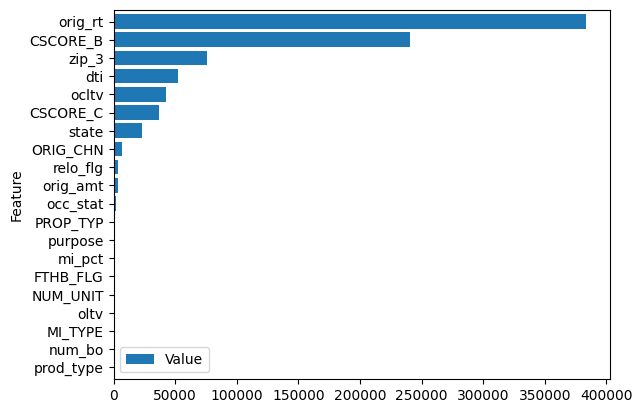

In [310]:
pd.DataFrame(
    {'Value':lgb_model.booster_.feature_importance(importance_type='gain'),
     'Feature':X.columns}).sort_values('Value', ascending=True).plot(
         x='Feature', 
         kind='barh',
         width=0.8,)

In [312]:
# lgb.plot_importance(lgb_model, figsize=(10, 10))

### Serialize the model

In [278]:
from mlem.api import save

In [279]:
path = os.path.join(os.getcwd(), "fnma-lgb-model")
save(lgb_model, path, sample_data=X.loc[ix_test][0:5])

MlemModel(location=Location(path='/Users/deburky/Documents/python/data/federal-home-loan-bank-system/fnma-lgb-model.mlem', project=None, rev=None, uri='file:///Users/deburky/Documents/python/data/federal-home-loan-bank-system/fnma-lgb-model.mlem', project_uri=None, fs=<fsspec.implementations.local.LocalFileSystem object at 0x938c00700>), params={}, artifacts={'data': LocalArtifact(uri='fnma-lgb-model', size=155447, hash='7b55f65f0b8de7ec40b538d6b8a1948d')}, requirements=Requirements(__root__=[InstallableRequirement(module='numpy', version='1.26.0', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='pandas', version='2.1.1', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), UnixPackageRequirement(package_name='libgomp1'), InstallableRequirement(module='lightgbm', version='4.1.0', package_name=None, extra_index=None, source_url=None, vcs=None, vcs_commit=None), InstallableRequirement(module='skl

### Clean-up database

In [291]:
list_of_tables = conn.execute(f"""SHOW TABLES;""").fetchdf()

In [294]:
for table in list_of_tables['name']:
    print(table)

Acquisitions_With_Default_Flag
Default_Flag_Table
acqFirstPeriod
acquisitionFile
acquisitions
combined_data
fnma_sf_loan_performance_r_primary


In [295]:
for table in list_of_tables['name']:
    print(table)
    conn.execute(f'DROP TABLE IF EXISTS {table};')
    print('dropped')

Acquisitions_With_Default_Flag
dropped
Default_Flag_Table
dropped
acqFirstPeriod
dropped
acquisitionFile
dropped
acquisitions
dropped
combined_data
dropped
fnma_sf_loan_performance_r_primary
dropped


In [296]:
# Database file
db_file_path = f"{os.getcwd()}/my_db.db"
if os.path.exists(db_file_path):
    os.remove(db_file_path)
else:
    print("The database file does not exist.")

# WAL file
wal_file_path = f"{os.getcwd()}/my_db.db.wal"
if os.path.exists(wal_file_path):
    os.remove(wal_file_path)
else:
    print("The WAL file does not exist.")

In [118]:
# query = """
# SELECT column_name, data_type, is_nullable, ordinal_position
# FROM information_schema.columns
# WHERE table_name = 'fnma_sf_loan_performance_r_primary'
# """

# df = conn.execute(f'{query}').fetchdf()

In [ ]:
# conn.execute(f'DROP TABLE IF EXISTS fnma_sf_loan_performance_r_primary;')
# conn.execute(f'DROP TABLE IF EXISTS acquisitions;')
# conn.execute(f'DROP TABLE IF EXISTS acquisitionFile;')
# conn.execute(f'DROP TABLE IF EXISTS acqFirstPeriod;')

In [ ]:
# DLQ_STATUS: Delinquency status.
# PMT_HISTORY: Payment history.

# MOD_FLAG: Modification flag.
# MI_CANCEL_FLAG: MI cancel flag.
# NET_SALES_PROCEEDS : Net sales proceeds.
# CUMULATIVE_CREDIT_EVENT_NET_GAIN_OR_LOSS